# Contribution of Deep-Learning Techniques towards fighting COVID-19: A Bibliometric Analysis of Scholarly Production during 2020


The COVID-19 has dramatically affected various aspects of human society with worldwide repercussions. Firstly, a serious public health issue has been generated with fatal results causing millions of deaths. Moreover, the global economy, social convivence, psychological status, mental health, and the human-environment relationship/dynamics have been seriously affected. Indeed, abrupt changes in our daily lives have been adopted starting with a mandatory quarantine and the application of biosafety measures. Due to the magnitude of these effects, research efforts from different fields were rapidly concentrated around the current pandemic to mitigate its adverse effects. Among these fields are Artificial Intelligence (AI) and Deep Learning (DL), which leverage many research papers to help combat COVID-19. The present work addresses a bibliometric analysis of this scholarly production during 2020. Specifically, we analyse quantitative and qualitative indicators and the factors that allow papers to significantly impact traditional metrics and alternative ones registered in social networks, digital mainstream media, and public policy documents. In this regard, we study the correlations between these different metrics and attributes. Finally, we analyze how the last DL advances have been exploited in the context of the COVID-19 situation, thus favoring to increase the knowledge about DL applications.

In this notebook, we share the code used to extract data from:

1. Altmetrics
2. Semantic Scholar
3. Crossref


## 1. Getting data from Altmetric

EndPoint: http://api.altmetric.com

Pre-requisite: The csv file (dois.csv) should have the documents' DOIs of the base corpus.

In [4]:
import pandas as pd
from datetime import date
import requests

S = requests.Session()

dataPath = 'data/'

data = pd.read_csv(dataPath+'dois.csv', sep = '|')

lenData = data.shape[0]
print('Number of documents extrated from Scopus:', lenData)
data.head
data.loc[0]['doi']

today = date.today().strftime("%Y-%m-%d"); print('Date:', today)

fileC = 'AltmetricsContext_' + today
fieldsC = ["idDoc","scope", "count","mean","rank","pct","higher_than"]

fileD = 'AltmetricsData_' + today
fieldsD = ["idDoc","title","pmid","altmetric_jid","altmetric_id","schema",
           "is_oa","cited_by_posts_count","cited_by_tweeters_count","cited_by_accounts_count",
           "readers_count", "last_updated", "score","added_on_date",
           "published_on_date","details_url"]

fileT = 'AltmetricsTriplets_' + today
fieldsT = ["idDoc","category","property","value"]

dataAlt = []
contextAlt = []
dataHistory = []


Number of documents extrated from Scopus: 433
Date: 2021-10-14


In [5]:
PARAMS = {
    "format": "json"
}

#Function that consumes data from Altmetric:

def getAltMetrics(lim1, lim2):
    
    for i in range(lim1, lim2):
        idD = data.loc[i]['id']
        doi = data.loc[i]['doi']
        url = 'https://api.altmetric.com/v1/doi/' + doi
        print(idD, url)
        request = S.get(url=url, params=PARAMS)
        if request.ok:
            countC = meanC = rankC= pctC= higher_thanC= title = pmid= altmetric_jid= altmetric_id = None
            schema = is_oa = cited_by_posts_count = cited_by_tweeters_count = cited_by_accounts_count = None
            last_updated = last_update_date = readers_count = score = added_on_date = None
            published_on_date  = details_url = None
            
            jsonAlt = request.json()
            if "context" in jsonAlt:
                for c in jsonAlt["context"]:
                    countC = jsonAlt["context"][c]['count']
                    meanC = jsonAlt["context"][c]['mean']
                    rankC = jsonAlt["context"][c]['rank']
                    pctC = jsonAlt["context"][c]['pct']
                    higher_thanC = jsonAlt["context"][c]['higher_than']
                    contextAlt.append([idD, c, countC, meanC, rankC, pctC, higher_thanC])
                
            title = jsonAlt["title"]
            if "pmid" in jsonAlt:
                pmid = jsonAlt["pmid"]
            if "altmetric_jid" in jsonAlt:
                altmetric_jid = jsonAlt["altmetric_jid"]
            altmetric_id  = jsonAlt["altmetric_id"]
            schema  = jsonAlt["schema"]
            is_oa  = jsonAlt["is_oa"]
            cited_by_posts_count= jsonAlt["cited_by_posts_count"]
            if "cited_by_tweeters_count" in jsonAlt:
                cited_by_tweeters_count = jsonAlt["cited_by_tweeters_count"]
            cited_by_accounts_count = jsonAlt["cited_by_accounts_count"]
            readers_count = jsonAlt['readers_count']
            last_updated  = date.fromtimestamp(jsonAlt["last_updated"]).strftime('%Y-%m-%d')
            score = jsonAlt["score"]
            added_on_date = date.fromtimestamp(jsonAlt["added_on"]).strftime('%Y-%m-%d')
            published_on_date = date.fromtimestamp(jsonAlt["published_on"]).strftime('%Y-%m-%d')
            details_url = jsonAlt["details_url"]
            history = jsonAlt["history"]
            dataAlt.append([idD, title, pmid, altmetric_jid, altmetric_id, schema, is_oa,
                         cited_by_posts_count, cited_by_tweeters_count, cited_by_accounts_count,
                         readers_count, last_updated, score, added_on_date,
                         published_on_date, details_url])
            for c in jsonAlt["readers"]:
                dataHistory.append([idD, 'readers', c, jsonAlt["readers"][c]])
            for c in jsonAlt["history"]:
                dataHistory.append([idD, 'history', c, jsonAlt["history"][c]])
            if "scopus_subjects" in jsonAlt:
                for c in jsonAlt["scopus_subjects"]:
                    dataHistory.append([idD, 'scopus_subjects', c, ""])
            

In [6]:
# To get document metadata execute this method. Parameters are the initial and final id of the documents extracted from scopus
getAltMetrics(0, lenData) # the last parameter should be setted according the number of documents.


1 https://api.altmetric.com/v1/doi/10.1155/2020/8828855
2 https://api.altmetric.com/v1/doi/10.1016/j.imu.2020.100427


In [7]:
# To save results is csv files:

import csv 

with open(dataPath + fileC + '.csv', 'w') as f:
    write = csv.writer(f) 
    write.writerow(fieldsC) 
    write.writerows(contextAlt)
    
with open(dataPath + fileD + '.csv', 'w') as f:
    write = csv.writer(f) 
    write.writerow(fieldsD) 
    write.writerows(dataAlt)
    
with open(dataPath + fileT + '.csv', 'w') as f:
    write = csv.writer(f) 
    write.writerow(fieldsT) 
    write.writerows(dataHistory)


## 2. Getting data from Semantic Scholar

EndPoint: https://pypi.org/project/semanticscholar/


In [25]:
# Create tables:
#con = connectDB()
papersTF = 'SScholar_Papers'; papersT = []
papersAF = 'SScholar_Papers_Authors'; papersA = []
papersTopicF = 'SScholar_Papers_topics'; papersTopic = []
papersAreaF = 'SScholar_Papers_area'; papersArea = [] 
papersCF = 'SScholar_Papers_References'; papersC = []
papersCAF = 'SScholar_Papers_References_Authors'; papersCA = []
papersIF = 'SScholar_Papers_intent'; papersI = []
#papersR = 'SScholar_Papers_References'
#papersRA = 'SScholar_ReferencesPapers_authors'

#General metadata:
#createTB(papersT, u"""date DATE, id_doc INT, doi text, paperId text, url text, arxivId VARCHAR(50), citations int, citationVelocity INT, corpusId text, influentialCitationCount INT, is_open_access BOOLEAN, is_publisher_licensed BOOLEAN, venue text, year VARCHAR(50)""")

#createTB(papersA, u"""id_doc INT, authorID int, authorName text, authorURL text, position int""")

# Papers that cites and references:
#createTB(papersC, u"""id_doc INT, typeR VARCHAR(50), paperCite text, doiCite text, title text, urlCite text, arxivIdCite VARCHAR(50), intent text, isInfluential boolean, venue text, year varchar(20)""") 
#createTB(papersCA, u"""paperCite text, doiCite text, authorID int, authorName TEXT, position INT""") 

# Section of intent of cited by or references:
#createTB(papersI, u"""id_doc INT, typeR VARCHAR(50), intent text, freq int""")

# Topics:
#createTB(papersTopic, u"""id_doc INT, topicID int, url text, topic text""")

# Fields Of Study:
#createTB(papersArea, u"""id_doc INT, area TEXT""")

#saveDB(con)
#closeDB(con)

In [26]:
import semanticscholar as sch
import string

def saveSScholar(id_doc, doi):
    #cur=con.cursor()
    paper = sch.paper(doi, timeout=5)
    if len(paper):
    # Unique values:
        citations = paper['citations'] # 
        papersT.append([date.today().strftime("%Y-%m-%d"), id_doc, paper['doi'], paper['paperId'], paper['url'], paper['arxivId'], len(citations), paper['citationVelocity'], paper['corpusId'], paper['influentialCitationCount'], paper['is_open_access'], paper['is_publisher_licensed'], paper['venue'], paper['year']])

        # Authors:
        pos = 1
        for author in paper['authors']:
            papersA.append([id_doc, author['authorId'], author['name'], author['url'], pos])
            pos = pos + 1
    
        # citations:       
        for c in citations:
            intentC = ', '.join(c['intent'])
            papersC.append([id_doc, 'citedBy', c['paperId'], c['doi'], c['title'], c['url'], c['arxivId'], intentC, c['isInfluential'], c['venue'], c['year']])
            authors = c['authors']
            pos = 1
            for a in authors:
                papersCA.append([c['paperId'], c['doi'], a['authorId'], a['name'], pos])
                pos = pos + 1
            
        # intention frecuency:
        if len(citations):
            stringIntent = [t['intent'][0] for t in citations if len(t['intent']) > 0]
            unique_words = set(stringIntent)
            countIntent = [[w, stringIntent.count(w)] for w in unique_words]
            for i in countIntent:
                papersI.append([id_doc, 'citedBy', i[0], i[1]])
            
        # Topics:
        topics = paper['topics'] 
        for t in topics:
            papersTopic.append([id_doc, t['topicId'], t['url'], t['topic']])

        for t in paper['fieldsOfStudy']:
            papersArea.append([id_doc, t])
        
        # references:        
        citations = paper['references'] # details -> 350 ****
        for c in citations:
            intentC = ', '.join(c['intent'])
            papersC.append([id_doc, 'reference', c['paperId'], c['doi'], c['title'], c['url'], c['arxivId'], intentC, c['isInfluential'], c['venue'], c['year']])
            authors = c['authors']
            pos = 1
            for a in authors:
                papersCA.append([c['paperId'], c['doi'], a['authorId'], a['name'], pos])
                pos = pos + 1

        # intention frecuency of references:
        if len(citations):
            stringIntent = [t['intent'][0] for t in citations if len(t['intent']) > 0]
            unique_words = set(stringIntent)
            countIntent = [[w, stringIntent.count(w)] for w in unique_words]
            for i in countIntent:
                papersI.append([id_doc, 'reference', i[0], i[1]])
    
    else:
        print('Not found')

# loop for the dois and get data from Scimago
def getDataSScholar(id1, id2):
    for id in range(id1, id2):
        row = data.iloc[id]
        idDoc = row[0]
        doi = row[1]
        print(doi)
        # Get metadata:
        saveSScholar(idDoc, doi)

In [45]:
# To run
getDataSScholar(0, lenData)

10.1155/2020/8828855
10.1016/j.imu.2020.100427
10.1007/s00259-020-05075-4


In [38]:
# To save results:

fieldsTF = ["date","id_doc", "doi","paperId","url","arxvId","citations", "citationVelocity", "corpusId", "influentialCitationCount", "is_open_access", "is_publisher_licensed", "venue", "year"]

with open(dataPath + papersTF + '.csv', 'w') as f:
    write = csv.writer(f) 
    write.writerow(fieldsTF) 
    write.writerows(papersT)

with open(dataPath + papersAF + '.csv', 'w') as f:
    write = csv.writer(f) 
    write.writerow(["id_doc", "authorID", "authorName", "authorURL", "position"]) 
    write.writerows(papersA)
    
with open(dataPath + papersTopicF + '.csv', 'w') as f:
    write = csv.writer(f) 
    write.writerow(["id_doc", "topicID", "url", "topic"]) 
    write.writerows(papersTopic)
    
with open(dataPath + papersAreaF + '.csv', 'w') as f:
    write = csv.writer(f) 
    write.writerow(["doi", "area"]) 
    write.writerows(papersArea)

with open(dataPath + papersCF + '.csv', 'w') as f:
    write = csv.writer(f) 
    write.writerow(["id_doc", "typeR", "paperCite", "doiCite", "title", "urlCite", "arxivIdCite", "intent", "isInfluential", "venue", "year"]) 
    write.writerows(papersC)

with open(dataPath + papersCAF + '.csv', 'w') as f:
    write = csv.writer(f) 
    write.writerow(["paperCite", "doiCite", "authorID", "authorName", "position"]) 
    write.writerows(papersCA)

with open(dataPath + papersIF + '.csv', 'w') as f:
    write = csv.writer(f) 
    write.writerow(["id_doc", "typeR", "intent", "freq"]) 
    write.writerows(papersI)



## 3. Getting data from Crossref

In [66]:

def extractCrossRef(id1, id2):
    for i in range(id1, id2):
        print(data.iloc[i]['id'], data.iloc[i]['doi'])
        url = 'https://api.crossref.org/works/'+ data.iloc[i]['doi'].upper()
        r = S.get(url)
        if r.ok:
            creationD = indexed = referenceCount = license = publishedOnline = link = deposited = None
            score = url = assertion = firstOnlike = None
            # get data
            rr = r.json()['message']
            creationD = rr['created']
            #print(creationD['date-parts'], creationD['date-time'], creationD['timestamp'])
            creationD = str(creationD['date-parts'][0][0]) + '-'+ str(creationD['date-parts'][0][1]) + '-'+str(creationD['date-parts'][0][2])
            indexed = rr['indexed']
            indexed = str(indexed['date-parts'][0][0]) + '-'+ str(indexed['date-parts'][0][1]) + '-'+str(indexed['date-parts'][0][2])
            referenceCount = rr['reference-count']
            if 'license' in rr:
                lenL = len(rr['license'])
                license = ''.join('(' + key +','+ str(val)+'), ' for key, val in rr['license'][lenL-1].items())
            #print(rr['published-online'])
            if 'published-online' in rr:
                publishedOnline = rr['published-online']
                if len(publishedOnline['date-parts'][0]) == 1:
                    publishedOnline = str(publishedOnline['date-parts'][0][0])
                else:
                    if len(publishedOnline['date-parts'][0]) == 2:
                        publishedOnline = str(publishedOnline['date-parts'][0][0]) + '-'+ str(publishedOnline['date-parts'][0][1])
                    else:
                        publishedOnline = str(publishedOnline['date-parts'][0][0]) + '-'+ str(publishedOnline['date-parts'][0][1]) + '-'+str(publishedOnline['date-parts'][0][2])
            if 'link' in rr:
                link = ''.join(val for key, val in rr['link'][0].items() if key == 'URL')
            if 'deposited':
                deposited = rr['deposited']
                deposited = str(deposited['date-parts'][0][0]) + '-'+ str(deposited['date-parts'][0][1]) + '-'+str(deposited['date-parts'][0][2])                                                                                          
            score = rr['score']
            url = rr['URL']
            if 'subject' in rr:
                subject = ','.join(rr['subject'])
            if 'assertion' in rr:
                assertion = rr['assertion']
                for a in rr['assertion']:
                    if 'label' in a:
                        if a['label'] == 'First Online':
                            firstOnlike = a['value']
            crossrefData.append([data.iloc[i]['id'], data.iloc[i]['doi'], creationD, indexed, referenceCount, license, publishedOnline, link, deposited, score, url, assertion, firstOnlike])
        else:
            print("not found")
                                                                                                         
                                                                                                         

In [67]:
crossrefData = []

extractCrossRef(0, 1)

1 10.1155/2020/8828855


In [69]:
# To save results:

len(crossrefData)

fields = ['id', 'doi', 'dateCreation', 'indexedDate', 'referenceCount', 
          'license', 'publishedOnline', 'link', 'dateDeposited', 'score', 'url', 'assertion', 'firstOnline']

with open(dataPath+'Crossref_'+today, 'w') as f:
    write = csv.writer(f) 
    write.writerow(fields) 
    write.writerows(crossrefData)


In [4]:
# Retrieve data

# Load Data
import pandas as pd 
from scipy.special import expit     # Use scipy to run a logistic function on the scores (to scale them from 0 to 1)z
from datetime import date

#closeDB(con)
con = connectDB()
cursor=con.cursor()
cursor.execute(u"""SELECT id, abstract FROM DOCUMENTOS_ALL;""")
areas = cursor.fetchall()
areas = pd.DataFrame(areas)
areas.columns=['id', 'abstract']


## 4. Visualization

### 4.1 Load integrated data

In [51]:
import pandas as pd 

url_a = dataPath + 'Documents.csv' 

covid = pd.read_csv(url_a)
covid.columns=['id', 'selected','code', 'top27add', 'doi', 'scopusDistributionDate', 'authors', 'title', 'abstract', 'year', 'scopusCitedBy',
               'affiliations',
             'authorKeywords', 'indexKeywords', 'lnpublisher', 'publisher',
             'Language', 'DocumentType', 'PublicationStage', 'OpenAccess', 'TopicsEvidentia',
             'pmid',  'sourceTitle', 
             'sourceid', 'SourceType', 'SJR', 'SJRBestQuartile', 'sourceHindex', 'SourceCountry', 
             'SourceRegion', 'SourceCoverage', 'SourceCategories', 'ssholarID', 'sscholarCitedBy', 
             'citationVelocity','influentialCitationCount', 'is_open_access', 'is_publisher_licensed',
              'eid', 'PaperAuthorsCount', 'FAuthorID', 'FAuthorName', 'FAuthorCitations', 
              'FAuthorCitedby', 'FAuthorDocCount', 'FAuthorHindex', 'FAuthorCareerLength', 
              'FAuthorCoauthorCount', 'FAuthorAffilid', 'FAuthorAffiliation', 'FAuthorCountrycode',
              'FAuthorCounty', 'FAuthorState', 
            'LAuthorID', 'LAuthorName', 'LAuthorCitations', 'LAuthorCitedby', 'LAuthorDocCount',
              'LAuthorHindex', 'LAuthorCareerLength', 'LAuthorCoauthorCount', 'LAuthorAffilid',
               'LAuthorAffiliation', 'LAuthorCountrycode', 'LAuthorCounty', 'LAuthorState',
                'cited_by_posts_count', 'cited_by_tweeters_count', 'cited_by_accounts_count',
                'altmetricsScore', 'altmetricsReaders', 'altmetricsLastUpdated', 
                'altmetricsAddedDate', 'altmetricsPublishedDate', 'citeulike', 'mendeley',
               'connotea', 'score1y', 'score6m', 'score3m', 'crdateCreation', 'crdateIndexed',
              'crdateDeposited', 'referenceCount', 'link', 'monthsAgo']

covid['is_open_access'] = covid['is_open_access'].astype('category')

In [49]:
# Summary of numerical data:
numAttr = ['scopusCitedBy', 'cited_by_posts_count', 'cited_by_tweeters_count', 
           'cited_by_accounts_count', 'altmetricsScore', 'sourceHindex', 'sscholarCitedBy', 
           'influentialCitationCount','PaperAuthorsCount', 'FAuthorCitations', 
              'FAuthorCitedby', 'FAuthorDocCount', 'FAuthorHindex', 'FAuthorCareerLength', 
              'FAuthorCoauthorCount', 'LAuthorCitations', 
              'LAuthorCitedby', 'LAuthorDocCount', 'LAuthorHindex', 'LAuthorCareerLength', 
              'LAuthorCoauthorCount', 'altmetricsReaders', 'mendeley',
               'score1y', 'score6m', 'score3m', 'monthsAgo']

nomAttr = ['publisher', 'DocumentType', 'OpenAccess', 'TopicsEvidentia',
             'last_updated', 'added_on_date', 'sourceTitle', 
             'SourceType', 'SourceCountry', 'SourceRegion', 
             'SourceCoverage', 'SourceCategories','is_open_access', 'is_publisher_licensed']

covid1 = covid.query("year == 2020 & DocumentType != 'Conference Review'")  

covid1.loc[:, numAttr].describe()

,scopusCitedBy,cited_by_posts_count,cited_by_tweeters_count,cited_by_accounts_count,altmetricsScore,sourceHindex,sscholarCitedBy,influentialCitationCount,PaperAuthorsCount,FAuthorCitations,...,LAuthorDocCount,LAuthorHindex,LAuthorCareerLength,LAuthorCoauthorCount,altmetricsReaders,mendeley,score1y,score6m,score3m,monthsAgo
count,333.000000,142.000000,137.000000,142.000000,142.000000,233.000000,314.000000,314.000000,333.000000,333.000000,...,333.000000,333.000000,333.000000,333.000000,142.000000,142.000000,142.000000,142.000000,142.000000,333.000000
mean,5.945946,13.781690,10.372263,11.147887,12.911831,80.420601,13.213376,1.054140,5.438438,280.117117,...,12.918919,12.348348,11.765766,222.678679,1788.542254,103.753521,12.890676,5.587662,1.233521,4.687688
std,18.636749,32.449003,25.375998,27.130090,35.592937,66.778093,43.890974,4.660376,4.751660,1122.213068,...,29.717891,15.730753,9.557960,786.274544,1826.473545,105.263545,35.455005,14.155128,3.380733,2.306042
min,0.000000,1.000000,1.000000,1.000000,0.250000,1.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,2.000000,2.000000,1.000000,30.000000,0.000000,0.000000,3.000000,1.000000,...,1.000000,1.000000,2.000000,9.000000,641.500000,38.250000,1.000000,0.000000,0.000000,3.000000
50%,0.000000,6.000000,5.000000,5.000000,2.350000,59.000000,1.000000,0.000000,4.000000,25.000000,...,3.000000,6.000000,10.000000,38.000000,1125.000000,71.000000,2.350000,1.375000,0.000000,4.000000
75%,3.000000,11.000000,8.000000,8.000000,6.412500,124.000000,7.000000,0.000000,6.000000,127.000000,...,11.000000,18.000000,19.000000,185.000000,2221.250000,127.500000,6.412500,3.500000,1.000000,6.000000
max,191.000000,248.000000,203.000000,220.000000,244.540000,300.000000,415.000000,61.000000,39.000000,14085.000000,...,264.000000,116.000000,41.000000,10603.000000,9930.000000,669.000000,241.538000,124.480000,25.350000,11.000000


In [50]:
covid1.loc[:, numAttr]

,scopusCitedBy,cited_by_posts_count,cited_by_tweeters_count,cited_by_accounts_count,altmetricsScore,sourceHindex,sscholarCitedBy,influentialCitationCount,PaperAuthorsCount,FAuthorCitations,...,LAuthorDocCount,LAuthorHindex,LAuthorCareerLength,LAuthorCoauthorCount,altmetricsReaders,mendeley,score1y,score6m,score3m,monthsAgo
0,2,7.0,7.0,7.0,3.35,37.0,4.0,0.0,4,3,...,80,65,7,10603,1054.0,62.0,3.35,3.35,0.00,6
1,1,5.0,5.0,5.0,3.20,13.0,2.0,0.0,7,67,...,18,17,15,156,1065.0,71.0,3.20,3.20,0.00,5
2,1,1.0,1.0,1.0,0.25,160.0,2.0,0.0,10,6,...,2,25,16,490,646.0,38.0,0.25,0.25,0.00,4
3,0,15.0,12.0,13.0,13.13,12.0,1.0,1.0,8,0,...,4,6,5,238,690.0,46.0,13.13,13.13,0.00,4
4,2,1.0,NaN,1.0,7.00,86.0,14.0,1.0,7,2,...,5,14,16,90,1395.0,93.0,7.00,7.00,0.00,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1,0,...,1,0,1,0,NaN,NaN,NaN,NaN,NaN,2
329,43,NaN,NaN,NaN,NaN,132.0,39.0,3.0,2,372,...,5,7,6,7,NaN,NaN,NaN,NaN,NaN,7
330,0,14.0,8.0,9.0,3.00,300.0,0.0,0.0,11,0,...,16,4,12,87,640.0,32.0,3.00,3.00,0.75,3
331,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,...,1,0,1,0,NaN,NaN,NaN,NaN,NaN,3


### 4.2  Summary 

4.2.a Publishing sources:

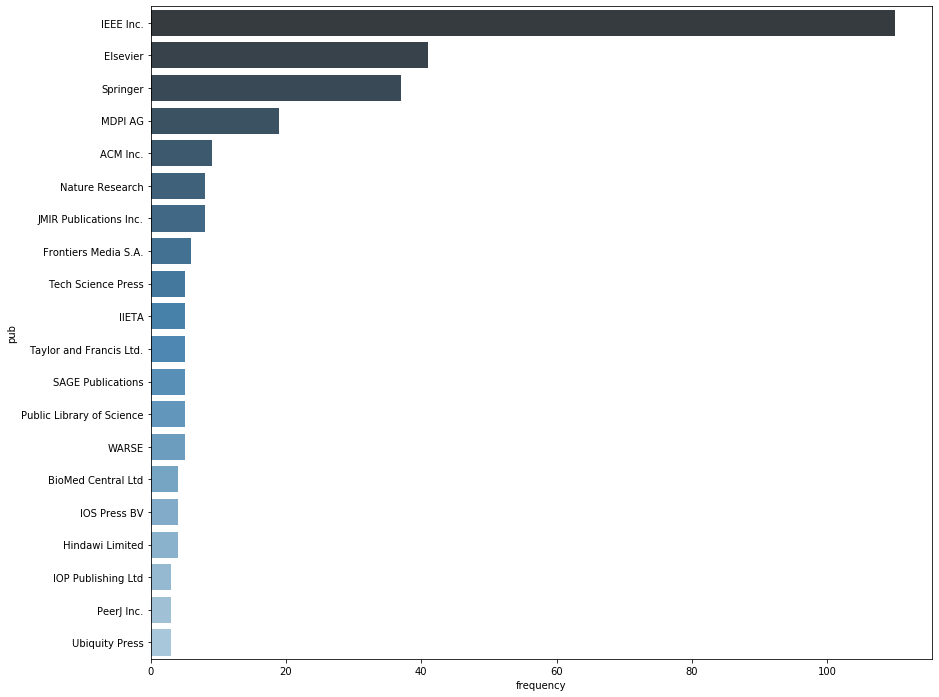

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(14,12))

pubCites = covid1.loc[:, ['publisher', 'scopusCitedBy', 'cited_by_tweeters_count', 'sscholarCitedBy', 'is_open_access', 'PaperAuthorsCount', 'FAuthorCitations', 
              'FAuthorCitedby', 'FAuthorDocCount', 'FAuthorHindex', 'FAuthorCareerLength', 
              'FAuthorCoauthorCount']]

pubSel = pd.DataFrame(pubCites['publisher'].value_counts())

pubSel.columns = ['frequency']
pubSel = pubSel.query('frequency >= 3')
pubSel = pubSel.sort_values(by = 'frequency', ascending=False)
pubSel['pub'] = pubSel.index
sns.barplot(y='pub', x='frequency', palette="Blues_d", data=pubSel, orient='h')


4.2.b Publishing: frequency vs. cites

In [59]:
# Scopus
scopusCites = pubCites.loc[:, ['publisher', 'scopusCitedBy']].groupby(['publisher']).sum()
scopusCites['pub'] = scopusCites.index
pubCites1 = pd.merge(pubSel, scopusCites, how='inner', on='pub')
pubCites1 = pubCites1[['pub', 'frequency', 'scopusCitedBy']]

# Altmetrics: cited_by_tweeters_count
altmetricsCites = pubCites.loc[:, ['publisher', 'cited_by_tweeters_count']].groupby(['publisher']).sum()
altmetricsCites['pub'] = altmetricsCites.index
pubCites2 = pd.merge(pubCites1, altmetricsCites, how='inner', on='pub')
 

# Scholar: sscholarCitedBy
ssemanticCites = pubCites.loc[:, ['publisher', 'sscholarCitedBy']].groupby(['publisher']).sum()
ssemanticCites['pub'] = ssemanticCites.index
pubCites3 = pd.merge(pubCites2, ssemanticCites, how='inner', on='pub')

cites_accross_sources = pd.merge(pubCites1, pubCites2) 

cites_accross_sources = pd.merge(cites_accross_sources, pubCites3); cites_accross_sources 

,pub,frequency,scopusCitedBy,cited_by_tweeters_count,sscholarCitedBy
0,IEEE Inc.,110,273,82.0,691.0
1,Elsevier,41,587,119.0,1136.0
2,Springer,37,363,150.0,713.0
3,MDPI AG,19,67,38.0,116.0
4,ACM Inc.,9,0,0.0,0.0
5,Nature Research,8,60,311.0,502.0
6,JMIR Publications Inc.,8,20,89.0,33.0
7,Frontiers Media S.A.,6,21,48.0,26.0
8,Tech Science Press,5,2,0.0,2.0
9,IIETA,5,4,0.0,2.0


4.2.c Cites by quartile

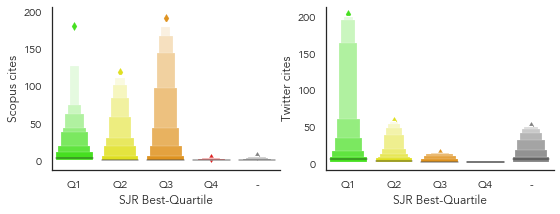

In [61]:
# Representación 1:

import seaborn as sns
sns.set(font="Avenir", style="white",rc={"patch.linewidth": 0.2})



fig, ax = plt.subplots(1,2, figsize=(9,3))

sns.boxenplot(x="SJRBestQuartile", y="scopusCitedBy",
              palette=['#33FF00', '#FFFF00', '#FF9900','#FF0000', 'grey'],
              order = ['Q1', 'Q2', 'Q3', 'Q4', '-'],
              scale="linear", data=covid1, ax=ax[0])#.set_title('Scopus cites')
ax[0].set(xlabel="SJR Best-Quartile", ylabel='Scopus cites')

sns.boxenplot(x="SJRBestQuartile", y="cited_by_tweeters_count",
              palette=['#33FF00', '#FFFF00', '#FF9900','#FF0000', 'grey'],
              order = ['Q1', 'Q2', 'Q3', 'Q4', '-'],
              scale="linear", data=covid1, ax=ax[1])#.set_title('Twitter cites')
ax[1].set(xlabel="SJR Best-Quartile", ylabel='Twitter cites')

sns.despine(left=False, bottom=False)#top=False,right=False, left=False)
#sns.swarmplot("gist_rainbow_r")
#sns.swarmplot(x="careerLength", y="hindex", hue="gender",data=auN, palette=['#797a7e', '#68b0ab'])
#plt.show()

4.2.d Correlation matrix

In [62]:

import numpy as np

corAttr = ['scopusCitedBy', 'sscholarCitedBy', 'influentialCitationCount', 'altmetricsScore',
            'FAuthorHindex', 'FAuthorCareerLength', 'FAuthorCoauthorCount',
              'LAuthorHindex', 'LAuthorCareerLength', 'LAuthorCoauthorCount'
              ]  # 'monthsAgo', 'sourceHindex', 'PaperAuthorsCount', 'FAuthorCoauthorCount', 'LAuthorDocCount', 'LAuthorCoauthorCount', 'FAuthorDocCount', 'FAuthorCitedby', , 'altmetricsScore', 'sourceHindex', 'influentialCitationCount', 


corrMatrixF = covid1.loc[:, corAttr]
corrMatrixF.columns = ['Scopus-Citations', 'SS-Citations', 'Influential-Citations', 'Altmetric-score',
            'FAuthor-Hindex', 'FAuthor-CL', 'FAuthor-Coauthors',
              'LAuthor-Hindex', 'LAuthor-CL', 'LAuthor-Coauthors']
corrMatrixF = corrMatrixF.corr()
for i in corrMatrixF:
    cx = corrMatrixF[i]
    cx = cx[(cx >= 0.35) | (cx <= -0.35)]
    if len(cx) > 1:
        print('\n',cx.sort_values(ascending=False))



 Scopus-Citations         1.000000
SS-Citations             0.793437
Influential-Citations    0.626186
Name: Scopus-Citations, dtype: float64

 SS-Citations             1.000000
Influential-Citations    0.929225
Scopus-Citations         0.793437
Name: SS-Citations, dtype: float64

 Influential-Citations    1.000000
SS-Citations             0.929225
Scopus-Citations         0.626186
Name: Influential-Citations, dtype: float64

 FAuthor-Hindex       1.000000
FAuthor-CL           0.709081
FAuthor-Coauthors    0.673979
Name: FAuthor-Hindex, dtype: float64

 FAuthor-CL           1.000000
FAuthor-Hindex       0.709081
FAuthor-Coauthors    0.506120
Name: FAuthor-CL, dtype: float64

 FAuthor-Coauthors    1.000000
FAuthor-Hindex       0.673979
FAuthor-CL           0.506120
Name: FAuthor-Coauthors, dtype: float64

 LAuthor-Hindex       1.000000
LAuthor-CL           0.688079
LAuthor-Coauthors    0.574456
Name: LAuthor-Hindex, dtype: float64

 LAuthor-CL        1.000000
LAuthor-Hindex    0.688079

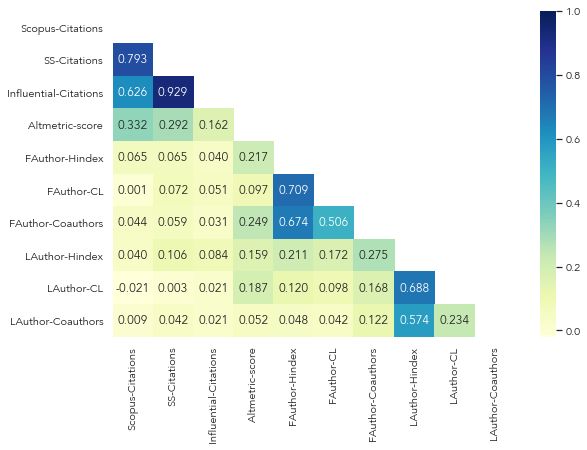

In [63]:
plt.rcParams['figure.figsize'] = (9, 6)

matrix = np.triu(corrMatrixF) # np.tril

sns.heatmap(corrMatrixF, annot=True, cmap="YlGnBu", fmt='.3f', mask=matrix) #
#sns.heatmap(corrMatrixF) 
plt.show()


#sns.heatmap(df_new.corr(), annot=True, mask=matrix)